In [76]:
# %matplotlib notebook
import math
import numpy as np
import scipy.special
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import itertools
import random, time

# Display Routines

In [52]:
# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#   - m_x: the number of subdivision of the x axis
#   - m_y: the number of subdivision of the y axis
#
def dyadic_subplot(xy, m_x, m_y, title="sequence"):
    ax = plt.gca()
    ax.plot(xy[:,0], xy[:,1], 'ko')
    
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xticks(np.linspace(0, 1, m_x+1))
    ax.set_yticks(np.linspace(0, 1, m_y+1))
    ax.grid()
    ax.axis('square')
    ax.axis([0.0,1.0,0.0,1.0])

    len_x = 1.0/m_x
    len_y = 1.0/m_y
    for iy in range(0, m_y):
        for ix in range(0, m_x):
            x = ix*len_x
            y = iy*len_y
            
            color = "#d3dce5"
            if (ix+iy) % 2 == 1:
                color = "#ffebea"
                
            ax.add_patch(plt.Rectangle((x, y), len_x, len_y, facecolor=color))

    ax.set_title(title)

# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#
# Output:
#   - A plot with a number of subplot corresponding to the amount of subdivision possible with the current
#     pointset.
#
def dyadic_plot(xy, title="sequence", sublevel=0):
    N = xy.shape[0]
    m = int( math.log(N) / math.log(2) ) + 1
    m = m + sublevel
    for subdiv in range(0, m):
        x_subdiv = 2**(subdiv)
        y_subdiv = 2**((m-1)-subdiv)
        plt.subplot(1, m, subdiv+1)
        dyadic_subplot(xy, x_subdiv, y_subdiv, title)
        
# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#
def available_subplot(xy, title="sequence"):
    ax = plt.gca()
    ax.plot(xy[:,0], xy[:,1], 'ko')
    
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    N = xy.shape[0]
    m = int( math.log(N) / math.log(2) ) + 1
    m = m + 1

    ax.set_xticks(np.linspace(0, 1, 2*N+1))
    ax.set_yticks(np.linspace(0, 1, 2*N+1))
    ax.grid()
    ax.axis('square')
    ax.axis([0.0,1.0,0.0,1.0])
    
    x1, y1 = [0.5, 0.5], [0.0, 1.0]
    x2, y2 = [0.0, 1.0], [0.5, 0.5]
    ax.plot(x1, y1, 'k', x2, y2, 'k',linewidth=1.25)
    
    x1, y1 = [0.25, 0.25], [0.0, 1.0]
    x2, y2 = [0.0, 1.0], [0.25, 0.25]
    x3, y3 = [0.75, 0.75], [0.0, 1.0]
    x4, y4 = [0.0, 1.0], [0.75, 0.75]
    ax.plot(x1, y1, 'k', x2, y2, 'k', x3, y3, 'k', x4, y4, 'k',linewidth=0.5)
    
    color = "#ffebea"
    for subdiv in range(0, m):
        m_x = 2**(subdiv)
        m_y = 2**((m-1)-subdiv)
        
        len_x = 1.0/m_x
        len_y = 1.0/m_y
        for i in range(0,N):
            ix = int( xy[i,0] * m_x )
            iy = int( xy[i,1] * m_y )
            x = ix / m_x
            y = iy / m_y

            ax.add_patch(plt.Rectangle((x, y), len_x, len_y, facecolor=color))

    ax.set_title(title)        

# Check pmj02 Routines

In [53]:
# Count the number of incorrect point in a dyadic decomposition
#
# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#   - m_x: the number of subdivision of the x axis
#   - m_y: the number of subdivision of the y axis
#
def count_invalid_points_for_interval(xy, m_x, m_y):
    N = xy.shape[0]
    len_x = 1.0/m_x
    len_y = 1.0/m_y
    
    nb_xy_in = np.zeros((m_x, m_y), int)

    for i in range(0, N):
        i_x = int(xy[i, 0] / len_x)
        i_y = int(xy[i, 1] / len_y)
        
        nb_xy_in[i_x, i_y] += 1
        
    return np.count_nonzero(nb_xy_in - 1)

# Return the number of invalid configurations
#
# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#
# Output:
#   - count: the number of invalid points
#
def count_invalid_points(xy):
    m = xy.shape[0]
    
    count = 0
    m = int( math.log(N) / math.log(2) ) + 1
    for subdiv in range(0, m):
        x_subdiv = 2**(subdiv)
        y_subdiv = 2**((m-1)-subdiv)
        count += count_invalid_points_for_interval(xy, x_subdiv, y_subdiv)
        
    return count

# Check if a given point set is dyadic with respect to a given subdivision of the 2d unit square
#
# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#   - m_x: the number of subdivision of the x axis
#   - m_y: the number of subdivision of the y axis
#
def check_dyadic_interval(xy, m_x, m_y):
    return count_invalid_points_for_interval(xy, m_x, m_y) == 0

# Check if a given point set is dyadic with respect to all power of two subdivision that matches the number
# of elements in the point set.
#
# Input:
#   - xy: a numpy matrix of size [n, 2], where n is the number of 2d points
#
# Output:
#   - is_dyadic: a boolean stating if the point set is dyadic
#
def check_dyadic_intervals(xy):
    m = xy.shape[0]
    
    is_dyadic = True
    m = int( math.log(N) / math.log(2) ) + 1
    for subdiv in range(0, m):
        x_subdiv = 2**(subdiv)
        y_subdiv = 2**((m-1)-subdiv)
        is_dyadic &= check_dyadic_interval(xy, x_subdiv, y_subdiv)
        
    return is_dyadic


# Print in console if the poinset is dyadic or not
#
def print_dyadicity(xy):
    if check_dyadic_intervals(xy):
       print("This point set is dyadic")
    else:
       print("This point set is *not* dyadic")

# Generate pmj02 Routines

[[ 0.1875  0.1875]
 [ 0.6875  0.6875]
 [ 0.9375  0.4375]
 [ 0.4375  0.9375]
 [ 0.3125  0.0625]
 [ 0.8125  0.5625]
 [ 0.5625  0.3125]
 [ 0.0625  0.8125]]
This point set is *not* dyadic


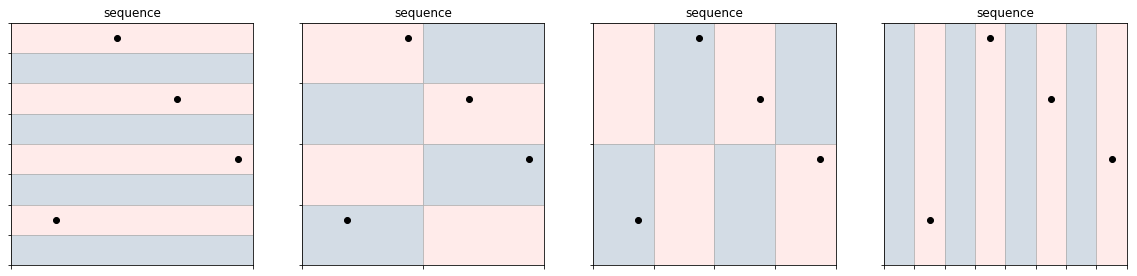

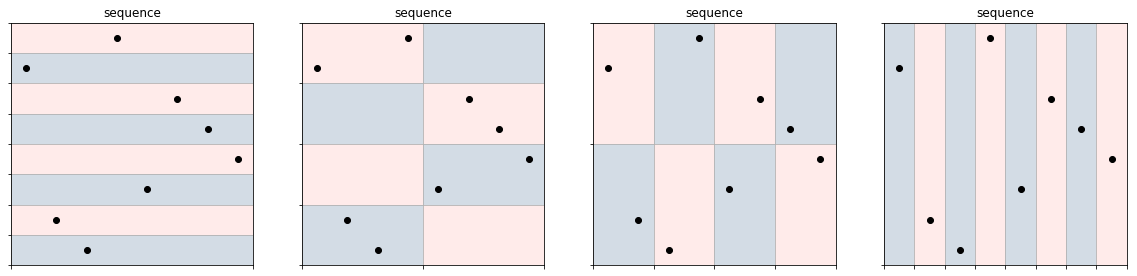

In [54]:
m = 3
N = 2**m      

xy = np.random.rand(N,2)
xy[0, 0] = 0.00 + 3.0/16.0
xy[0, 1] = 0.00 + 3.0/16.0
xy[1, 0] = 0.50 + 3.0/16.0
xy[1, 1] = 0.50 + 3.0/16.0
xy[2, 0] = 0.75 + 3.0/16.0
xy[2, 1] = 0.25 + 3.0/16.0
xy[3, 0] = 0.25 + 3.0/16.0
xy[3, 1] = 0.75 + 3.0/16.0


plt.figure(figsize=(20, 5))
dyadic_plot(xy[0:4, :], sublevel=1)

xor_x = 3 << 1
xor_y = 1 << 1
M = 16
xy[4, 0] = (int(M*xy[0, 0]) ^ xor_x) / M
xy[4, 1] = (int(M*xy[0, 1]) ^ xor_y) / M
xy[5, 0] = (int(M*xy[1, 0]) ^ xor_x) / M
xy[5, 1] = (int(M*xy[1, 1]) ^ xor_y) / M
xy[6, 0] = (int(M*xy[2, 0]) ^ xor_x) / M
xy[6, 1] = (int(M*xy[2, 1]) ^ xor_y) / M
xy[7, 0] = (int(M*xy[3, 0]) ^ xor_x) / M
xy[7, 1] = (int(M*xy[3, 1]) ^ xor_y) / M

print(xy)

plt.figure(figsize=(20, 5))
dyadic_plot(xy, sublevel=0)

if check_dyadic_intervals(xy):
    print("This point set is dyadic")
else:
    print("This point set is *not* dyadic")


xor value = (7, 7)
This point set is dyadic


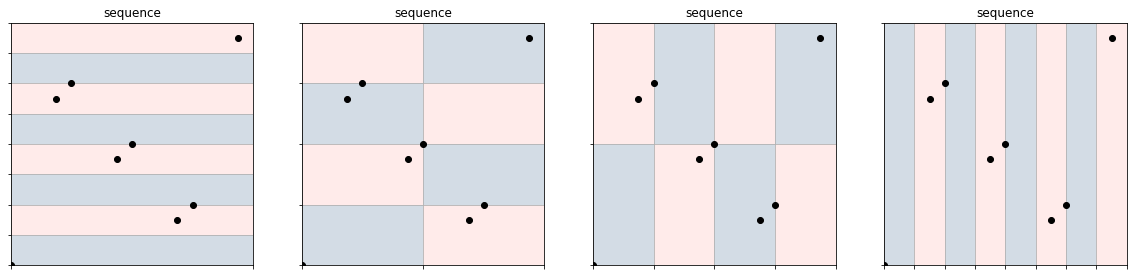

In [55]:
m = 3
N = 2**m      

xy = np.random.rand(N,2)
xy[0, 0] = 0.0
xy[0, 1] = 0.0
xy[1, 0] = 0.5
xy[1, 1] = 0.5
xy[2, 0] = 0.75
xy[2, 1] = 0.25
xy[3, 0] = 0.25
xy[3, 1] = 0.75

xor_x = (3 << 1) + 1
xor_y = (3 << 1) + 1
print("xor value = " + str((xor_x, xor_y)))

M = 16
xy[4, 0] = (int(M*xy[0, 0]) ^ xor_x) / M
xy[4, 1] = (int(M*xy[0, 1]) ^ xor_y) / M
xy[5, 0] = (int(M*xy[1, 0]) ^ xor_x) / M
xy[5, 1] = (int(M*xy[1, 1]) ^ xor_y) / M
xy[6, 0] = (int(M*xy[2, 0]) ^ xor_x) / M
xy[6, 1] = (int(M*xy[2, 1]) ^ xor_y) / M
xy[7, 0] = (int(M*xy[3, 0]) ^ xor_x) / M
xy[7, 1] = (int(M*xy[3, 1]) ^ xor_y) / M

plt.figure(figsize=(20, 5))
dyadic_plot(xy, sublevel=0)

if check_dyadic_intervals(xy):
    print("This point set is dyadic")
else:
    print("This point set is *not* dyadic")

xor value = (64, 128)


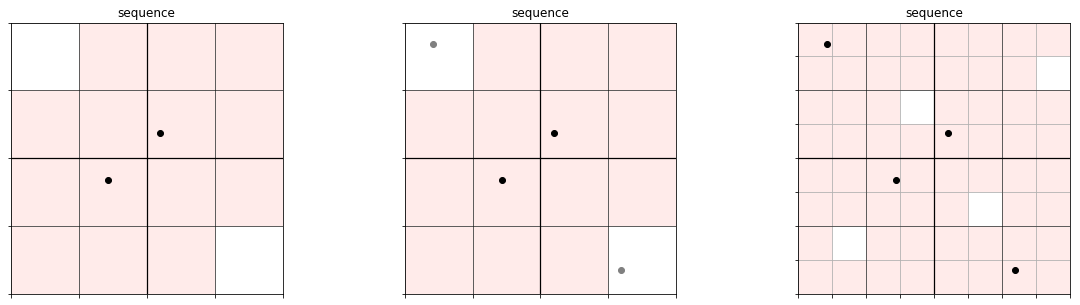

In [56]:
m = 2
N = 2**m      

xy = np.random.rand(N,2)
xy[0, 0] = 0.548814
xy[0, 1] = 0.592845
xy[1, 0] = 0.357595
xy[1, 1] = 0.422133
# xy[0, 0] = 0.0
# xy[0, 1] = 0.0
# xy[1, 0] = 0.5
# xy[1, 1] = 0.5

xor_x = 64
xor_y = 128
print("xor value = " + str((xor_x, xor_y)))

M = 256
xy[2, 0] = (int(M*xy[0, 0]) ^ xor_x) / M
xy[2, 1] = (int(M*xy[0, 1]) ^ xor_y) / M
xy[3, 0] = (int(M*xy[1, 0]) ^ xor_x) / M
xy[3, 1] = (int(M*xy[1, 1]) ^ xor_y) / M

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
available_subplot(xy[0:N//2, :])

plt.subplot(1, 3, 2)
available_subplot(xy[0:N//2, :])
ax = plt.gca()
ax.plot(xy[N//2:N,0], xy[N//2:N,1], 'o', color= (0.5, 0.5, 0.5))

plt.subplot(1, 3, 3)
available_subplot(xy[0:N, :])

xor vector = (32, 192)
This point set is dyadic


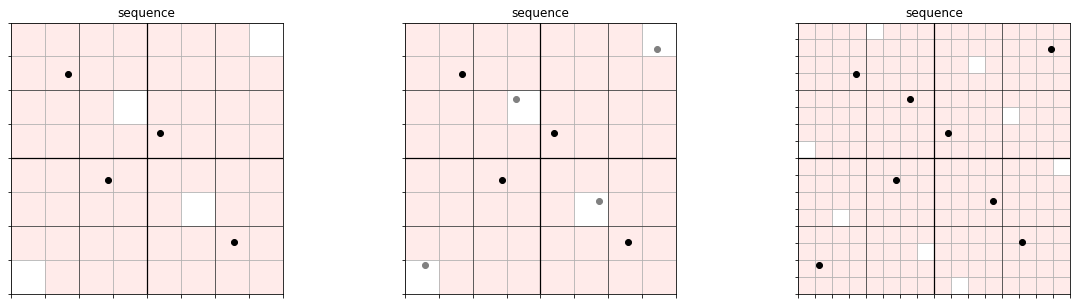

In [81]:
m = 3
N = 2**m

xy = np.zeros((N,2))
xy[0, 0] = 0.548814
xy[0, 1] = 0.592845
xy[1, 0] = 0.357595
xy[1, 1] = 0.422133
xy[2, 0] = 0.211827
xy[2, 1] = 0.811782
xy[3, 0] = 0.822947
xy[3, 1] = 0.192191

xor_x = 32
xor_y = 128 + 64
print("xor vector = " + str((xor_x, xor_y)))

M = 256
K = 4
for k in range(0,K):
    xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x) ^ random.randint(0,31) ) / M
    xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y) ^ random.randint(0,31) ) / M


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
available_subplot(xy[0:N//2, :])

plt.subplot(1, 3, 2)
available_subplot(xy[0:N//2, :])

ax = plt.gca()
ax.plot(xy[N//2:N,0], xy[N//2:N,1], 'o', color= (0.5, 0.5, 0.5))

plt.subplot(1, 3, 3)
available_subplot(xy[0:N, :])

print_dyadicity(xy)

# Temporary variable to store the pmj02 sequence generated by the current method
xy_8spp = xy

xor vector = (48, 64)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



This point set is *not* dyadic


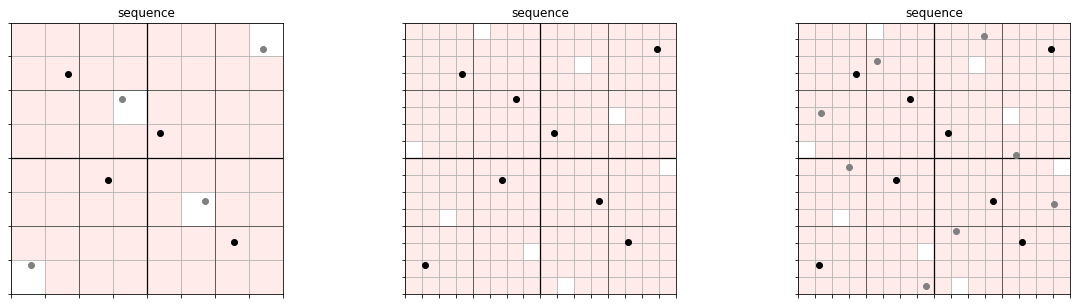

In [82]:
m = 4
N = 2**m

xy = np.zeros((N,2))
xy[0:8, :] = xy_8spp
# xy[0, 0] = 0.548814
# xy[0, 1] = 0.592845
# xy[1, 0] = 0.357595
# xy[1, 1] = 0.422133
# xy[2, 0] = 0.211827
# xy[2, 1] = 0.811782
# xy[3, 0] = 0.822947
# xy[3, 1] = 0.192191

# M = 256
# xor_x = 32
# xor_y = 128 + 64

# K = 4
# for k in range(0,K):
#     xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x)) / M
#     xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y)) / M

xor_x = 32 + 16
xor_y = 64
# xor_x = 16
# xor_y = 128
print("xor vector = " + str((xor_x, xor_y)))

K = 8
for k in range(0,K):
    xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x)) / M
    xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y)) / M


    
min_xor_x = xor_x
min_xor_y = xor_y
count = count_invalid_points(xy)

# Do random permutation of the XOR
nb_try = 0
while( not check_dyadic_intervals(xy) and nb_try < 10000):
    
    xor_x = random.randint(0,255)
    xor_y = random.randint(0,255)
    print("min xor vector = " + str((min_xor_x, min_xor_y)) + "   ", end='\r', flush=True)
    
    for k in range(0,K):
        xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x)) / M
        xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y)) / M
            
    cur_count = count_invalid_points(xy)
    if(cur_count < count):
        count = cur_count
        min_xor_x = xor_x
        min_xor_y = xor_y
        
    nb_try += 1
    
    
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
available_subplot(xy[0:N//4, :])

ax = plt.gca()
ax.plot(xy[N//4:N//2,0], xy[N//4:N//2,1], 'o', color= (0.5, 0.5, 0.5))
    
plt.subplot(1, 3, 2)
available_subplot(xy[0:N//2, :])

plt.subplot(1, 3, 3)
available_subplot(xy[0:N//2, :])
ax = plt.gca()
ax.plot(xy[N//2:N,0], xy[N//2:N,1], 'o', color= (0.5, 0.5, 0.5))

print_dyadicity(xy)

xor vector = (42, 52)
This point set is dyadic


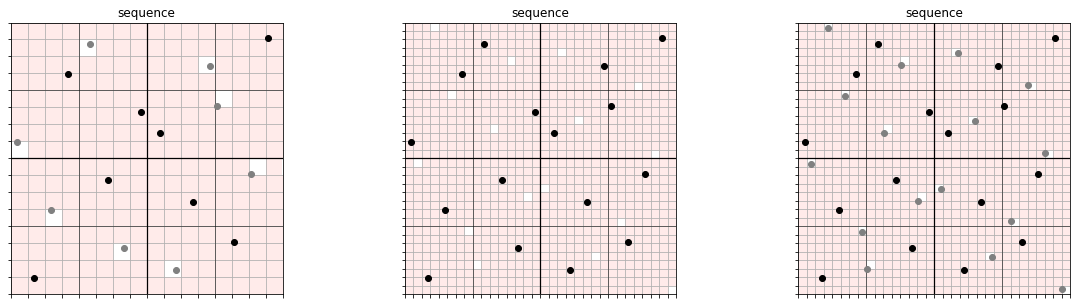

In [59]:
m = 5
N = 2**m

uv = np.zeros((N,2))
uv[0:N//2, :] = xy[0:N//2, :]

M = 256
xor_x = 32 + 8 + 2
xor_y = 32 + 16 + 4
# xor_x = 8
# xor_y = 128 + 64 + 32 + 16
print("xor vector = " + str((xor_x, xor_y)))

K = N//2
for k in range(0,K):
    uv[K+k, 0] = ((int(M*uv[k, 0]) ^ xor_x)) / M
    uv[K+k, 1] = ((int(M*uv[k, 1]) ^ xor_y)) / M


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
available_subplot(xy[0:N//4, :])
ax = plt.gca()
ax.plot(uv[N//4:N//2,0], uv[N//4:N//2,1], 'o', color= (0.5, 0.5, 0.5))

plt.subplot(1, 3, 2)
available_subplot(uv[0:N//2, :])

plt.subplot(1, 3, 3)
available_subplot(uv[0:N//2, :])
ax = plt.gca()
ax.plot(uv[N//2:N,0], uv[N//2:N,1], 'o', color= (0.5, 0.5, 0.5))

print_dyadicity(uv)

new xor vector = (12, 90) 
This point set is *not* dyadic


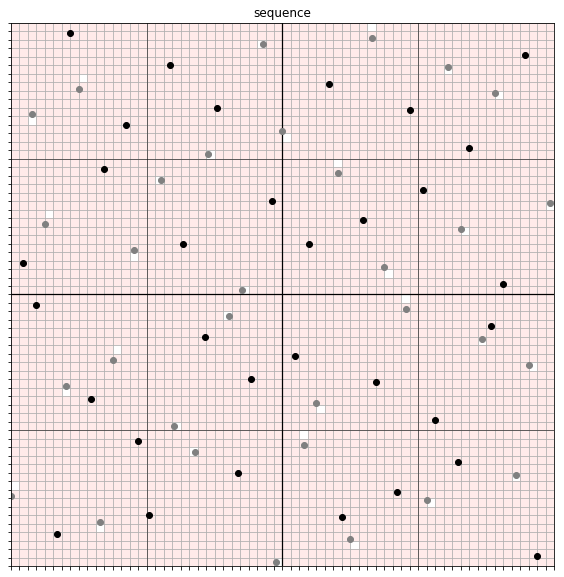

In [63]:
m = 6
N = 2**m

xy = np.zeros((N,2))
xy[0:N//2, :] = uv[0:N//2, :]

M = 256
xor_x = 0
xor_y = 0

K = N//2
for k in range(0,K):
    xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x)) / M
    xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y)) / M

min_xor_x = xor_x
min_xor_y = xor_y
count = count_invalid_points(xy)

# Do random permutation of the XOR
nb_try = 0
while( not check_dyadic_intervals(xy) and nb_try < 1000):
    
    xor_x = xor_x ^ (2<<random.randint(0,5))
    xor_y = xor_y ^ (2<<random.randint(0,5))
    print("xor vector = " + str((xor_x, xor_y)) + "   ", end='\r', flush=True)
    
    for k in range(0,K):
        xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x)) / M
        xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y)) / M
        
    nb_try += 1
    
    cur_count = count_invalid_points(xy)
    if(cur_count < count):
        count = cur_count
        min_xor_x = xor_x
        min_xor_y = xor_y

        
xor_x = min_xor_x
xor_y = min_xor_y
for k in range(0,K):
    xy[K+k, 0] = ((int(M*xy[k, 0]) ^ xor_x)) / M
    xy[K+k, 1] = ((int(M*xy[k, 1]) ^ xor_y)) / M
    
print("new xor vector = " + str((xor_x, xor_y)))
        
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
available_subplot(xy[0:N//2, :])
ax.plot(xy[N//2:N,0], xy[N//2:N,1], 'o', color= (0.5, 0.5, 0.5))

print_dyadicity(xy)